In [59]:
import pandas as pd
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
import tensorflow as tf
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np


In [41]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
telco_df = pd.read_csv('gdrive/My Drive/telco_churn.csv')
telco_df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [43]:
telco_df.drop(columns=['Unnamed: 0', 'customerID' ],inplace=True)
churn_no = {'Yes':1,'No':0}
telco_df.Churn.replace(churn_no,inplace=True)
telco_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [44]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [45]:
# convert total charges from object to numerical
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'],errors='coerce')
telco_df['TotalCharges'].fillna(0,inplace=True)

In [46]:
encoder = OneHotEncoder()
scaler = MinMaxScaler()
def preprocessing(dataframe,drop=None):
    y=dataframe['Churn']
    if drop==None:
        dataframe = dataframe
    else:
        length = len(drop)
        if length == 1:
            dataframe = dataframe.drop(columns=[str(drop)])
        else:
            dataframe = dataframe.drop(columns=[str(d) for d in drop])
    dataframe = dataframe.drop(columns=["Churn"])
    numeric_features = dataframe.columns[dataframe.dtypes!=object].tolist()
    categorical_features = dataframe.columns[dataframe.dtypes==object].tolist()
    num = scaler.fit_transform(dataframe[numeric_features])
    cat = encoder.fit_transform(dataframe[categorical_features].values).toarray()
    cat_df = pd.DataFrame(cat,columns=encoder.get_feature_names(categorical_features))
    num_df = pd.DataFrame(num,columns=numeric_features)
    x = pd.merge(num_df,cat_df,left_index=True,right_index=True)
    return x,y
    

In [47]:
x,y = preprocessing(telco_df)
x,y = RandomUnderSampler(random_state=32).fit_resample(x,y)
x.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(3738, 45)

In [48]:
y.dtype

dtype('int64')

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, random_state=34)

In [50]:
x_train.shape

(2616, 45)

In [51]:
y_train.shape

(2616,)

In [54]:
model = Sequential()
model.add(Flatten(input_shape=(45,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy,metrics=tf.keras.metrics.Precision())
history = model.fit(x_train,y_train,batch_size=100,epochs=15)

Epoch 1/20
27/27 [==============================] - 1s 2ms/step - loss: 0.6207 - precision_10: 0.6073
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 0.5272 - precision_10: 0.7204
Epoch 3/20
27/27 [==============================] - 0s 2ms/step - loss: 0.5067 - precision_10: 0.7432
Epoch 4/20
27/27 [==============================] - 0s 2ms/step - loss: 0.4918 - precision_10: 0.7519
Epoch 5/20
27/27 [==============================] - 0s 2ms/step - loss: 0.4860 - precision_10: 0.7513
Epoch 6/20
27/27 [==============================] - 0s 2ms/step - loss: 0.4794 - precision_10: 0.7553
Epoch 7/20
27/27 [==============================] - 0s 2ms/step - loss: 0.4760 - precision_10: 0.7504
Epoch 8/20
27/27 [==============================] - 0s 2ms/step - loss: 0.4717 - precision_10: 0.7612
Epoch 9/20
27/27 [==============================] - 0s 2ms/step - loss: 0.4695 - precision_10: 0.7566
Epoch 10/20
27/27 [==============================] - 0s 2ms/step - loss: 0.4666 - 

In [56]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

36/36 [==============================] - 0s 1ms/step - loss: 0.5261 - precision_10: 0.7216


In [61]:
y_predict = model.predict(x_test)
y_pred = np.around(y_predict)
y_pred

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [63]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       553
           1       0.72      0.79      0.76       569

    accuracy                           0.74      1122
   macro avg       0.74      0.74      0.74      1122
weighted avg       0.74      0.74      0.74      1122



In [77]:
history.history

{'loss': [0.6335721015930176,
  0.5336857438087463,
  0.5101418495178223,
  0.49776363372802734,
  0.48936769366264343,
  0.4826434850692749,
  0.47760215401649475,
  0.4750886559486389,
  0.4728585481643677,
  0.46705126762390137,
  0.46499577164649963,
  0.46350881457328796,
  0.46359583735466003,
  0.4608636200428009,
  0.4568546712398529],
 'precision_14': [0.6632911562919617,
  0.7185080647468567,
  0.7387190461158752,
  0.7422606348991394,
  0.7440519332885742,
  0.7442196607589722,
  0.7578008770942688,
  0.7583892345428467,
  0.7528818249702454,
  0.7611070871353149,
  0.7567175030708313,
  0.7519544959068298,
  0.7605321407318115,
  0.7620764374732971,
  0.760869562625885]}

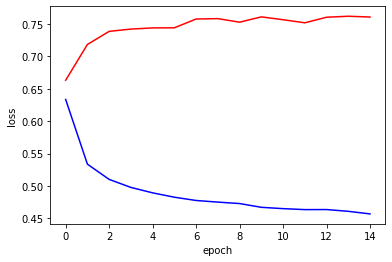

In [78]:
plt.plot(history.history['loss'],'blue')
plt.plot(history.history['precision_14'],'red')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [64]:
# dropping some columns
x,y = preprocessing(telco_df,drop=['MultipleLines','gender','StreamingTV','StreamingMovies'])
x,y = RandomUnderSampler(random_state=32).fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, random_state=34)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [82]:
model2 = Sequential()
model2.add(Flatten(input_shape=(34,)))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy,metrics=tf.keras.metrics.Precision())
history = model2.fit(x_train,y_train,batch_size=100,epochs=15)

Epoch 1/15
27/27 [==============================] - 1s 2ms/step - loss: 0.6011 - precision_16: 0.6845
Epoch 2/15
27/27 [==============================] - 0s 2ms/step - loss: 0.5187 - precision_16: 0.7235
Epoch 3/15
27/27 [==============================] - 0s 2ms/step - loss: 0.5032 - precision_16: 0.7281
Epoch 4/15
27/27 [==============================] - 0s 2ms/step - loss: 0.4915 - precision_16: 0.7346
Epoch 5/15
27/27 [==============================] - 0s 2ms/step - loss: 0.4866 - precision_16: 0.7388
Epoch 6/15
27/27 [==============================] - 0s 2ms/step - loss: 0.4828 - precision_16: 0.7417
Epoch 7/15
27/27 [==============================] - 0s 2ms/step - loss: 0.4776 - precision_16: 0.7514
Epoch 8/15
27/27 [==============================] - 0s 2ms/step - loss: 0.4749 - precision_16: 0.7522
Epoch 9/15
27/27 [==============================] - 0s 2ms/step - loss: 0.4738 - precision_16: 0.7573
Epoch 10/15
27/27 [==============================] - 0s 2ms/step - loss: 0.4729 - 

In [83]:
test_loss, test_accuracy = model2.evaluate(x_test,y_test)

36/36 [==============================] - 0s 1ms/step - loss: 0.5212 - precision_16: 0.7328


In [84]:
y_predict = model2.predict(x_test)
y_pred = np.around(y_predict)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       553
           1       0.73      0.77      0.75       569

    accuracy                           0.74      1122
   macro avg       0.74      0.74      0.74      1122
weighted avg       0.74      0.74      0.74      1122

